In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [2]:
f = lambda x : (5 * np.exp(-(x - 0.9)**2 / 0.5) + 5 * np.exp(-(x + 0.2)**2 / 0.5)) / 12.53301604174127

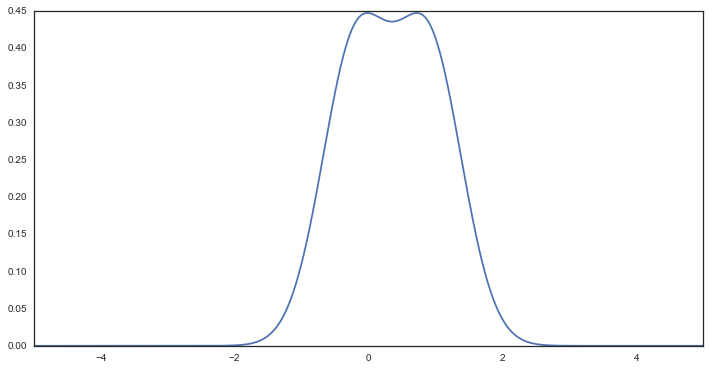

In [3]:
X = np.linspace(-5,5,100000)
plt.figure(figsize=(12,6))
plt.plot(X, f(X))
plt.xlim(-5,5)
plt.show()

### Metropolis Algorithm

In [4]:
N = 100000
X_samples = np.zeros(N)
X_samples[0] = np.random.normal(0,1)

accept = 0

for i in range(1,N):
    x_prev = X_samples[i-1]
    p_prev = f(x_prev)
    x_star = np.random.normal(x_prev,0.1)
    p_star = f(x_star)
    
    u = np.random.uniform()
    if u < p_star/p_prev:
        X_samples[i] = x_star
        accept += 1
    else:
        X_samples[i] = x_prev

print accept

96267


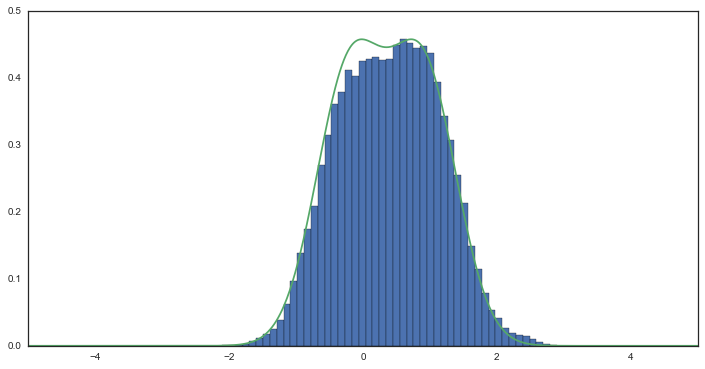

In [5]:
X = np.linspace(-5,5,1000)
plt.figure(figsize=(12,6))
h=plt.hist(X_samples,bins=50,normed=True)
plt.plot(X, np.max(h[0])/np.max(f(X))*f(X))
plt.xlim(-5,5)
plt.show()

### Metropolis Algorithm with Dynamic Step Size

$$x^{*} \sim Normal(x, \sigma) ,$$

$$\sigma = \frac{0.1}{2 p(x)+0.1}$$

In [6]:
# New Proposal Function
def proposal(x_prev):
    sigma = 0.1 / (2*f(x_prev)+0.1)
    return np.random.normal(x_prev, sigma)

In [7]:
N = 100000
X_samples = np.zeros(N)
X_samples[0] = np.random.normal(0,1)
accept = 0
for i in range(1,N):
    x_prev = X_samples[i-1]
    p_prev = f(x_prev)
    x_star = proposal(x_prev)
    p_star = f(x_star)
    
    u = np.random.uniform()
    if u < p_star/p_prev:
        X_samples[i] = x_star
        accept += 1
    else:
        X_samples[i] = x_prev

print accept

97048


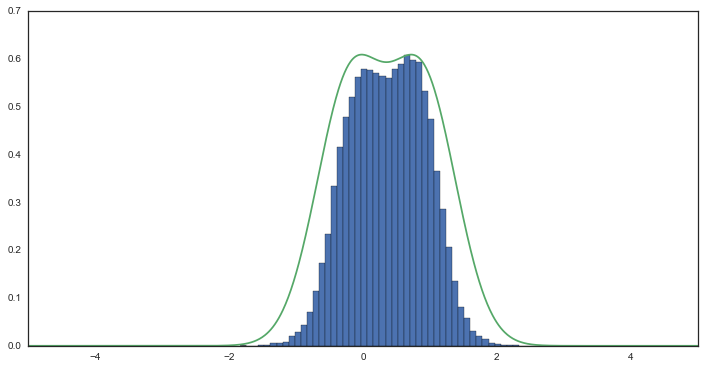

In [8]:
X = np.linspace(-5,5,1000)
plt.figure(figsize=(12,6))
h=plt.hist(X_samples,bins=50, normed=True)
plt.plot(X, np.max(h[0])/np.max(f(X))*f(X))
plt.xlim(-5,5)
plt.show()

### Metroplis Algorithm with Temperatures

$$acceptance = \frac{p(x^{*})}{p(x)}^{\frac{1}{T}} $$

#### High Temperature

In [9]:
# Changing Temperatures
# High Temperature
T = 10.0
N = 100000
X_samples = np.zeros(N)
X_samples[0] = np.random.normal(-4,1)

accept = 0

for i in range(1,N):
    x_prev = X_samples[i-1]
    p_prev = f(x_prev)
    x_star = np.random.normal(x_prev,0.1)
    p_star = f(x_star)
    
    u = np.random.uniform()
    if u < (p_star/p_prev)**(1/T):
        X_samples[i] = x_star
        accept += 1
    else:
        X_samples[i] = x_prev

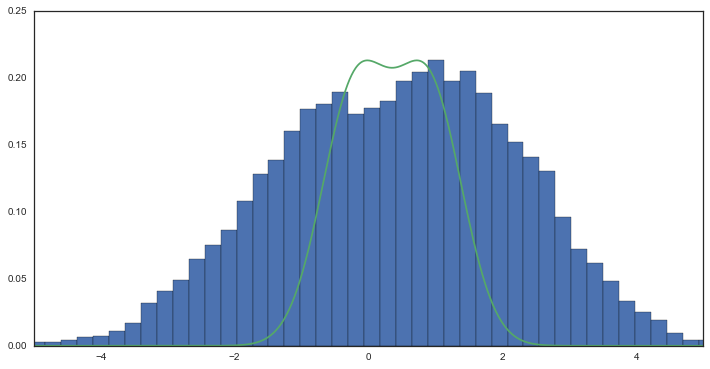

In [10]:
X = np.linspace(-5,5,1000)
plt.figure(figsize=(12,6))
h=plt.hist(X_samples,bins=50, normed=True)
plt.plot(X, np.max(h[0])/np.max(f(X))*f(X))
plt.xlim(-5,5)
plt.show()

In [11]:
# Changing Temperatures
# Low Temperature
T = 0.1
N = 100000
X_samples = np.zeros(N)
X_samples[0] = np.random.normal(-4,1)

accept = 0

for i in range(1,N):
    x_prev = X_samples[i-1]
    p_prev = f(x_prev)
    x_star = np.random.normal(x_prev,0.1)
    p_star = f(x_star)
    
    u = np.random.uniform()
    if u < (p_star/p_prev)**(1/T):
        X_samples[i] = x_star
        accept += 1
    else:
        X_samples[i] = x_prev

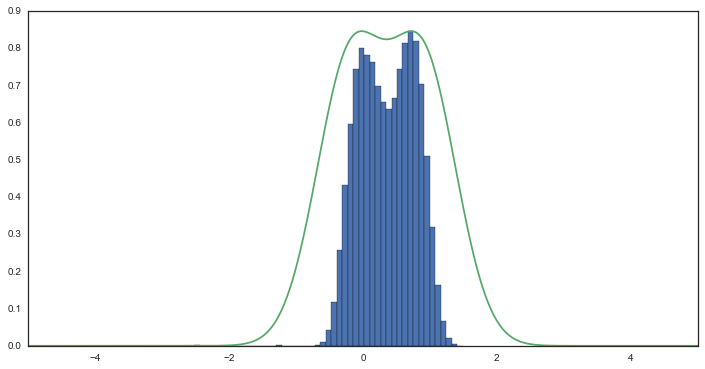

In [12]:
X = np.linspace(-5,5,1000)
plt.figure(figsize=(12,6))
h=plt.hist(X_samples,bins=50, normed=True)
plt.plot(X, np.max(h[0])/np.max(f(X))*f(X))
plt.xlim(-5,5)
plt.show()

In [13]:
# Changing Temperatures - Dynamic
# Initial Temperature
T = 1.0
N = 100000
X_samples = np.zeros(N)
X_samples[0] = np.random.normal(-4,1)

accept = 0

for i in range(1,N):
    x_prev = X_samples[i-1]
    p_prev = f(x_prev)
    x_star = np.random.normal(x_prev,0.1)
    p_star = f(x_star)
    
    u = np.random.uniform()
    T = 0.5/(p_prev+1.)
    if u < (p_star/p_prev)**(1/T):
        X_samples[i] = x_star
        accept += 1
    else:
        X_samples[i] = x_prev

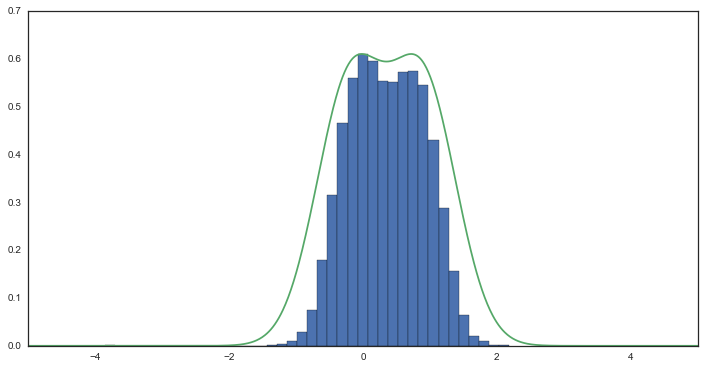

In [14]:
X = np.linspace(-5,5,1000)
plt.figure(figsize=(12,6))
h=plt.hist(X_samples,bins=50, normed=True)
plt.plot(X, np.max(h[0])/np.max(f(X))*f(X))
plt.xlim(-5,5)
plt.show()